In [112]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [113]:
data = pd.read_csv("breast-cancer.csv")

In [114]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [115]:
Y=['diagnosis']
X=list(set(list(data.columns))-set(Y))
data[X]=data[X]/data[X].max()
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,0.033327,0.137186,0.000010,0.000954,0.000994,0.009671,1.0
radius_mean,569.0,0.502572,0.125366,0.248346,0.416222,0.475631,0.561366,1.0
texture_mean,569.0,0.491081,0.109497,0.247200,0.411660,0.479633,0.554990,1.0
perimeter_mean,569.0,0.487899,0.128907,0.232308,0.398780,0.457507,0.552255,1.0
area_mean,569.0,0.261851,0.140709,0.057377,0.168053,0.220352,0.312955,1.0
smoothness_mean,569.0,0.589720,0.086072,0.322093,0.528580,0.586720,0.644431,1.0
compactness_mean,569.0,0.302087,0.152903,0.056109,0.187956,0.268182,0.377533,1.0
concavity_mean,569.0,0.208058,0.186785,0.000000,0.069260,0.144189,0.306232,1.0
concave points_mean,569.0,0.243137,0.192857,0.000000,0.100944,0.166501,0.367793,1.0
symmetry_mean,569.0,0.595927,0.090179,0.348684,0.532566,0.589474,0.643750,1.0


In [116]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X=data[X].values
Y=data[Y].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)#test size is 20% of the data, remaining 80 is training
print(X_train.shape, X_test.shape)

(455, 31) (114, 31)


              precision    recall  f1-score   support

           B       0.97      0.97      0.97        75
           M       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

0.9649122807017544


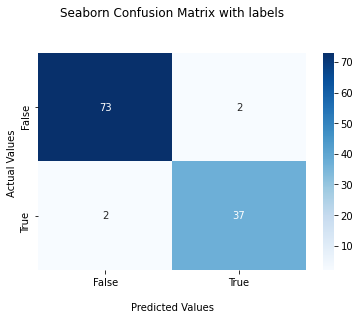

In [117]:
#kNN Classification Model
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) #uses 5 nearest neigbors, minkowski decides the distance between the points
                                                                    # p=2 uses euclidean_distance (l2) 
clf.fit(X_train, np.ravel(Y_train))

clf.predict(X_train)
Y_predict_test=clf.predict(X_test)

print(classification_report(Y_test, Y_predict_test)) 
print(accuracy_score(Y_test, Y_predict_test))

cf=confusion_matrix(Y_test, Y_predict_test)

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        75
           M       1.00      0.90      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544


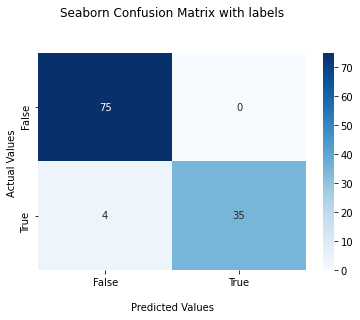

In [118]:
#Logistic Regression Classification Model
clf = LogisticRegression(random_state=0)
clf.fit(X_train, np.ravel(Y_train))

clf.predict(X_train)
Y_predict_test=clf.predict(X_test)

print(classification_report(Y_test, Y_predict_test)) 
print(accuracy_score(Y_test, Y_predict_test))

cf=confusion_matrix(Y_test, Y_predict_test)

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        75
           M       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

0.9824561403508771


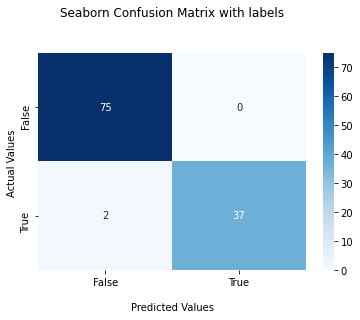

In [119]:
#Neural Network Classification Model
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(8,8,8), max_iter=5000, activation ='relu' ) # hidden_layer_sizes=(5, 2)
clf.fit(X_train, np.ravel(Y_train))

clf.predict(X_train)
Y_predict_test=clf.predict(X_test)

print(classification_report(Y_test, Y_predict_test)) 
print(accuracy_score(Y_test, Y_predict_test))

cf=confusion_matrix(Y_test, Y_predict_test)

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()